# Information Gain
Information gain is a concept used in decision tree algorithms for classification tasks. It measures the amount of information provided by a feature in reducing the uncertainty about the class labels of the samples.

In classification problems, we aim to assign class labels to instances based on their feature values. Decision trees are a popular method for performing this task, where each internal node represents a feature, each branch represents a possible value of that feature, and each leaf node represents a class label.

To construct a decision tree, we need to determine the order in which features are evaluated. Information gain helps us in this process by quantifying the usefulness of each feature for classification. It measures the reduction in entropy or impurity that a feature provides when it is used to split the data.

In [1]:
import pandas as pd

In [3]:
df=pd.read_csv('https://gist.githubusercontent.com/tijptjik/9408623/raw/b237fa5848349a14a14e5d4107dc7897c21951f5/wine.csv')
df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
df['Wine'].unique()

array([1, 2, 3], dtype=int64)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [6]:
df.describe()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [7]:
x = df.drop('Wine', axis = 1)
y = df[['Wine']]

#Train test split
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(x, y, test_size=0.3, random_state=0)

In [8]:
X_train.head()

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
22,13.71,1.86,2.36,16.6,101,2.61,2.88,0.27,1.69,3.80,1.11,4.00,1035
108,12.22,1.29,1.94,19.0,92,2.36,2.04,0.39,2.08,2.70,0.86,3.02,312
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
145,13.16,3.57,2.15,21.0,102,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830
71,13.86,1.51,2.67,25.0,86,2.95,2.86,0.21,1.87,3.38,1.36,3.16,410


In [10]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.feature_selection import mutual_info_classif as ms
# determine the mutual information
mutual_info = ms(X_train, y_train)
mutual_info

array([0.42307209, 0.30374536, 0.15180604, 0.26832608, 0.20497099,
       0.49171715, 0.7246538 , 0.09689377, 0.26236895, 0.62800268,
       0.53656758, 0.55705506, 0.53671122])

In [11]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending = False)

Flavanoids              0.724654
Color.int               0.628003
OD                      0.557055
Proline                 0.536711
Hue                     0.536568
Phenols                 0.491717
Alcohol                 0.423072
Malic.acid              0.303745
Acl                     0.268326
Proanth                 0.262369
Mg                      0.204971
Ash                     0.151806
Nonflavanoid.phenols    0.096894
dtype: float64

<Axes: >

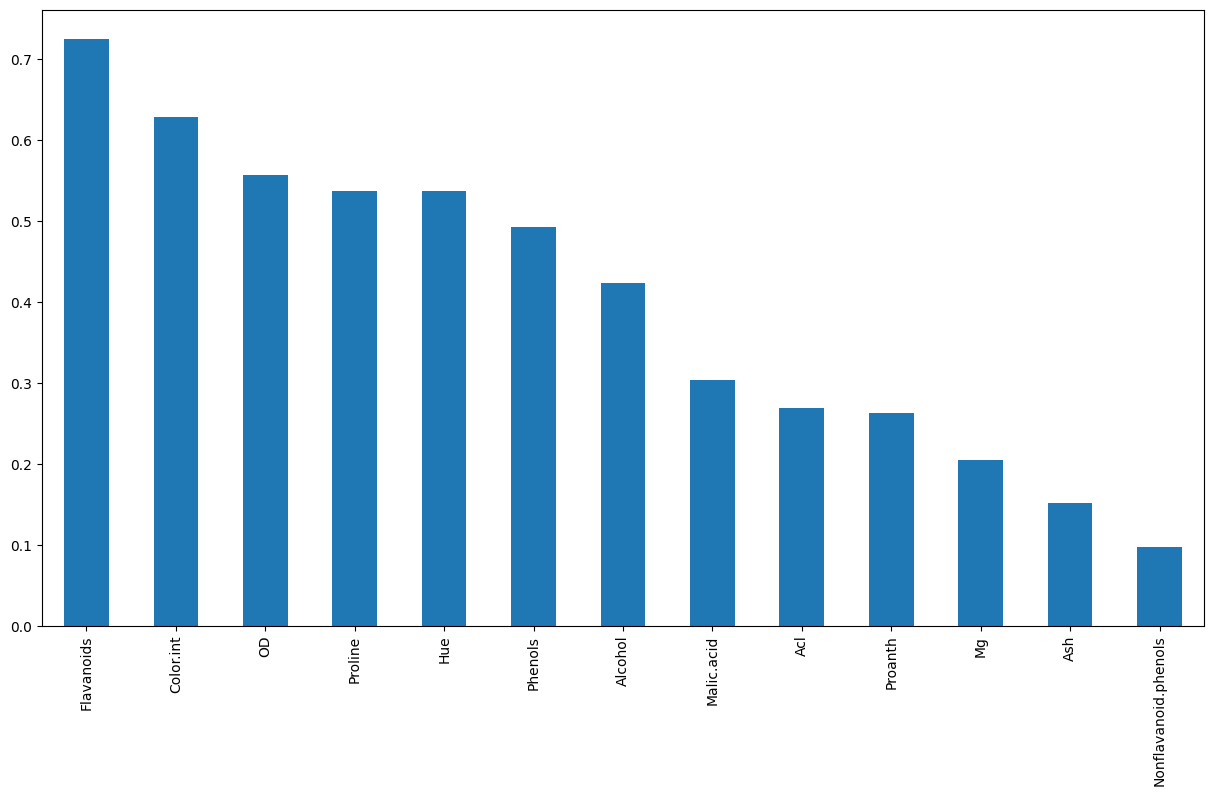

In [13]:
mutual_info.sort_values(ascending  = False).plot.bar (figsize = (15,8))

# Mutual Gain

In [14]:
from sklearn.feature_selection import SelectKBest

In [18]:
#k is the number of features we are selecting from the datatset
selected_col = SelectKBest(ms, k=5)
selected_col.fit(X_train, y_train)
final_col = X_train.columns[selected_col.get_support()]

### Difference Between Information Gain And Mutual Information

I(X ; Y) = H(X) – H(X | Y) and IG(S, a) = H(S) – H(S | a)

As such, mutual information is sometimes used as a synonym for information gain. Technically, they calculate the same quantity if applied to the same data.

In [19]:
final_col

Index(['Flavanoids', 'Color.int', 'Hue', 'OD', 'Proline'], dtype='object')

In [22]:
df[final_col].head()

,Flavanoids,Color.int,Hue,OD,Proline
0,3.06,5.64,1.04,3.92,1065
1,2.76,4.38,1.05,3.40,1050
2,3.24,5.68,1.03,3.17,1185
3,3.49,7.80,0.86,3.45,1480
4,2.69,4.32,1.04,2.93,735


In [21]:
df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
